Epoch 1/50
391/391 [==============================] - 0s 434us/step - loss: 0.0049
Epoch 2/50
391/391 [==============================] - 0s 385us/step - loss: 0.0049
Epoch 3/50
391/391 [==============================] - 0s 377us/step - loss: 0.0048
Epoch 4/50
391/391 [==============================] - 0s 380us/step - loss: 0.0048
Epoch 5/50
391/391 [==============================] - 0s 402us/step - loss: 0.0048
Epoch 6/50
391/391 [==============================] - 0s 399us/step - loss: 0.0048
Epoch 7/50
391/391 [==============================] - 0s 402us/step - loss: 0.0048
Epoch 8/50
391/391 [==============================] - 0s 388us/step - loss: 0.0048
Epoch 9/50
391/391 [==============================] - 0s 383us/step - loss: 0.0048
Epoch 10/50
391/391 [==============================] - 0s 387us/step - loss: 0.0048
Epoch 11/50
391/391 [==============================] - 0s 465us/step - loss: 0.0048
Epoch 12/50
391/391 [==============================] - 0s 391us/step - loss: 0.0048
E

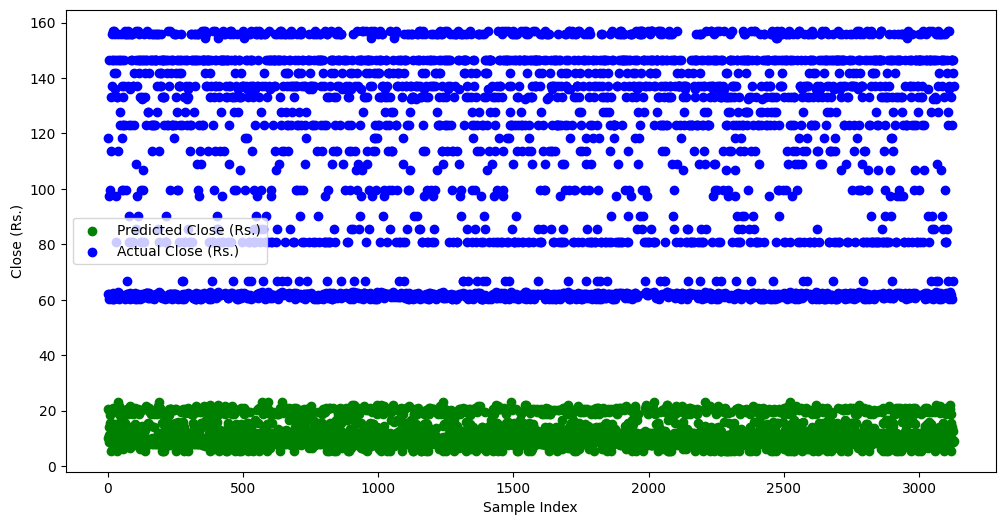

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load and preprocess data
df = pd.read_csv('./all_data.csv')  # Replace 'your_data.csv' with your dataset file path
data = df[['Loan Rate', 'Close (Rs.)']]

# Normalize the data (scaling between 0 and 1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Split the data into training and testing sets
X = scaled_data[:, 0]  # Features (Loan Rate)
y = scaled_data[:, 1]  # Target variable (Close (Rs.))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=1))  # Input layer
model.add(Dense(units=16, activation='relu'))  # Hidden layer
model.add(Dense(units=1, activation='linear'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error (MSE): {mse}')

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions to the original scale
predictions = scaler.inverse_transform(np.hstack((X_test.reshape(-1, 1), predictions)))

# Create a timeline for the x-axis
timeline = np.arange(1, len(X_test) + 1)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.scatter(timeline, predictions[:, 0], label='Predicted Close (Rs.)', color='green')
plt.scatter(timeline, predictions[:, 1], label='Actual Close (Rs.)', color='blue')
plt.xlabel('Sample Index')
plt.ylabel('Close (Rs.)')
plt.legend()
plt.show()

Epoch 1/50
9/9 [==============================] - 0s 672us/step - loss: 741.8068
Epoch 2/50
9/9 [==============================] - 0s 901us/step - loss: 730.9661
Epoch 3/50
9/9 [==============================] - 0s 572us/step - loss: 719.8876
Epoch 4/50
9/9 [==============================] - 0s 979us/step - loss: 708.4576
Epoch 5/50
9/9 [==============================] - 0s 564us/step - loss: 696.7362
Epoch 6/50
9/9 [==============================] - 0s 1ms/step - loss: 683.4077
Epoch 7/50
9/9 [==============================] - 0s 594us/step - loss: 669.3632
Epoch 8/50
9/9 [==============================] - 0s 962us/step - loss: 652.3992
Epoch 9/50
9/9 [==============================] - 0s 604us/step - loss: 635.1739
Epoch 10/50
9/9 [==============================] - 0s 977us/step - loss: 616.0104
Epoch 11/50
9/9 [==============================] - 0s 601us/step - loss: 593.7823
Epoch 12/50
9/9 [==============================] - 0s 740us/step - loss: 569.9305
Epoch 13/50
9/9 [==========

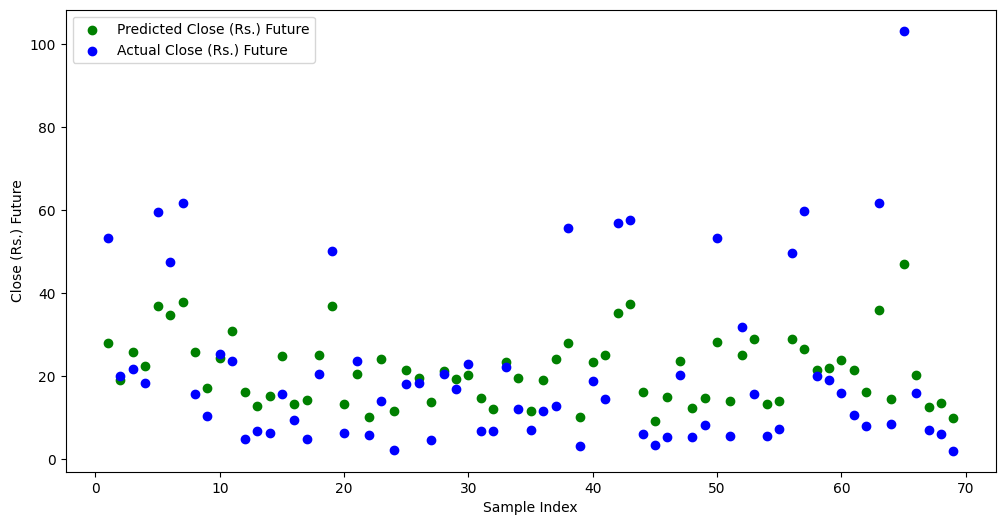

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load your dataset
df = pd.read_csv('./all_data.csv')  # Replace 'your_data.csv' with your dataset file path
selected_label = 'BOGA.N0000'
df = df.loc[df['Label'] == selected_label]
df = df.loc[df['Label'] == selected_label]

# Extract features and target
X = df[['Year', 'Month', 'Close (Rs.)']].values
y = df['Close (Rs.)'].values

# Normalize the data (scaling between 0 and 1)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=X.shape[1]))  # Input layer
model.add(Dense(units=16, activation='relu'))  # Hidden layer
model.add(Dense(units=1, activation='linear'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error (MSE): {mse}')

# Make predictions
predictions = model.predict(X_test)

# Create a timeline for the x-axis
timeline = np.arange(1, len(X_test) + 1)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.scatter(timeline, predictions, label='Predicted Close (Rs.) Future', color='green')
plt.scatter(timeline, y_test, label='Actual Close (Rs.) Future', color='blue')
plt.xlabel('Sample Index')
plt.ylabel('Close (Rs.) Future')
plt.legend()
plt.show()

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load and preprocess data
df = pd.read_csv('./all_data.csv')  # Replace 'your_data.csv' with your dataset file path
df

,Label,Year,Month,Close (Rs.),TradeVolume,ShareVolume,Turnover (Rs.),Loan Rate,Inflation,Buy Rate,Election
0,ACL.N0000,1995,1,190.000000,1.5,750.0,145950.0,20.7,2.4,49.9600,0
1,ASIR.N0000,1995,1,33.911765,2.0,1074.0,39195.0,20.7,2.4,49.9600,0
2,BFL.N0000,1995,1,26.375000,14.0,5850.0,161200.0,20.7,2.4,49.9600,0
3,BOGA.N0000,1995,1,4.180556,8.0,8100.0,34362.5,20.7,2.4,49.9600,0
4,BRWN.N0000,1995,1,423.050000,2.0,400.0,180700.0,20.7,2.4,49.9600,0
...,...,...,...,...,...,...,...,...,...,...,...
15627,SHOT.N0000,2023,9,14.447368,45.0,74167.0,1045064.6,12.0,1.3,317.5436,0
15628,SPEN.N0000,2023,9,141.868421,24.0,9783.0,1400686.5,12.0,1.3,317.5436,0
15629,TILE.N0000,2023,9,47.631579,42.0,29117.0,1388307.2,12.0,1.3,317.5436,0
15630,TKYO.N0000,2023,9,56.300000,53.0,78086.0,4406369.4,12.0,1.3,317.5436,0


In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



# Sort the data by 'Year' and 'Month' if not already sorted
# Load your dataset
df = pd.read_csv('./all_data.csv')  # Replace 'your_data.csv' with your dataset file path
selected_label = 'BOGA.N0000'
df = df.loc[df['Label'] == selected_label]

# Select relevant features
features = ['Loan Rate', 'Inflation', 'Buy Rate', 'Election', 'Close (Rs.)']  # Replace 'Target' with your actual column name
df = df[features]

# Normalize the data
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])


# Create sequences for input and output
sequence_length = 5  # You can adjust this based on the number of past values to consider
X = []
y = []

for i in range(sequence_length, len(df)):
    X.append(df.iloc[i - sequence_length:i].values)
    y.append(df.iloc[i]['Close (Rs.)'])

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Neural Network Model
model = keras.Sequential([
    layers.LSTM(50, activation='relu', return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    layers.LSTM(50, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the Model
loss = model.evaluate(X_test, y_test)
print("Mean Squared Error (MSE):", loss)

new_data = np.array([
    [0.25, 0.02, 0.6, 1, 0.0],  # Include a placeholder value for 'Close (Rs.)'
    [0.3, 0.03, 0.55, 0, 0.0]  # Include a placeholder value for 'Close (Rs.)'
    # Add more rows here
])

# Normalize the new data
new_data = scaler.transform(new_data)

# Reshape the input data
new_data = new_data.reshape(len(new_data), sequence_length, len(features))

# Make predictions
predicted_values = model.predict(new_data)

# Inverse transform the predicted values
predicted_values = scaler.inverse_transform(predicted_values)

for i, predicted_value in enumerate(predicted_values):
    print(f"Predicted Close (Rs.) for data point {i + 1}: {predicted_value[0]}")









Epoch 1/50
9/9 [==============================] - 1s 3ms/step - loss: 0.0296
Epoch 2/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 3/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0132
Epoch 4/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0092
Epoch 5/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 6/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 7/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 8/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 9/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 10/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 11/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 12/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0040
Epoch 13/50
9/9 [==============================] - 0s 4ms/step - loss: 0.

/Users/kelumrubasin/anaconda3/envs/testenv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


ValueError: cannot reshape array of size 10 into shape (2,5,5)